In [1]:
!kaggle datasets download -d fatemehmehrparvar/lung-disease

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
License(s): Attribution 4.0 International (CC BY 4.0)
 72% 25.0M/34.9M [00:00<00:00, 34.6MB/s]
100% 34.9M/34.9M [00:00<00:00, 48.8MB/s]


In [2]:
%cd Dataset

/content/Dataset


In [3]:
!unzip /content/lung-disease.zip

Archive:  /content/lung-disease.zip
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/10.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/100.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1000.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1001.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1002.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1003.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1004.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1005.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1006.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1007.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1008.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1009.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/

In [4]:
%cd ..

/content


In [1]:
!pip install scikit-learn==1.4.2


In [2]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import prewitt
from scipy.ndimage import gaussian_filter
from scipy.signal import butter, filtfilt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:
Lung_Opacity = "/content/Dataset/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity"
Normal = "/content/Dataset/Lung X-Ray Image/Lung X-Ray Image/Normal"
Viral_Pneumonia = "/content/Dataset/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia"

file_paths = ([os.path.join(Lung_Opacity, f) for f in os.listdir(Lung_Opacity)] + [os.path.join(Normal, f) for f in os.listdir(Normal)] + [os.path.join(Viral_Pneumonia, f) for f in os.listdir(Viral_Pneumonia)])
labels = ['Lung Opacity'] * len(os.listdir(Lung_Opacity)) + ['Normal'] * len(os.listdir(Normal)) + ['Viral Pneumonia'] * len(os.listdir(Viral_Pneumonia))

images = []
for path in file_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    images.append(img)



data = pd.DataFrame({'Image': images, 'label': labels})
data.sample(10)

,Image,label
372,"[[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, ...",Lung Opacity
1001,"[[41, 40, 39, 39, 39, 39, 39, 39, 39, 39, 38, ...",Lung Opacity
1648,"[[166, 144, 129, 125, 123, 120, 120, 117, 117,...",Normal
3282,"[[32, 32, 33, 32, 33, 34, 33, 34, 33, 32, 34, ...",Viral Pneumonia
2075,"[[58, 57, 56, 56, 57, 56, 54, 55, 54, 51, 48, ...",Normal
2224,"[[30, 31, 29, 45, 52, 55, 54, 78, 90, 103, 104...",Normal
1185,"[[50, 60, 62, 64, 68, 71, 70, 72, 70, 73, 78, ...",Normal
1786,"[[74, 34, 29, 30, 30, 30, 30, 30, 30, 30, 30, ...",Normal
574,"[[51, 42, 40, 40, 40, 40, 40, 39, 39, 39, 38, ...",Lung Opacity
1685,"[[40, 42, 42, 42, 43, 42, 40, 37, 37, 38, 122,...",Normal


In [ ]:
 #Apply Gaussian smoothing to each image
sigma = 1.0  # Standard deviation
Gaussian_smoothing = np.zeros_like(data['Image'])
for index,img in enumerate(data['Image']):
    Gaussian_smoothing[index] = gaussian_filter(img, sigma)

In [ ]:
Gradient_sharpening = np.zeros_like(data['Image'])
for index,img in enumerate(data['Image']):
  Gradient_sharpening[index]=prewitt(img, axis=0)

In [ ]:
# Define Butterworth lowpass filter parameters
cutoff_freq = 2.0  # Cutoff frequency in Hz
order = 2  # Filter order

# Normalize the cutoff frequency
normalized_cutoff = cutoff_freq / (0.5 * 5)

# Design Butterworth lowpass filter
b, a = butter(order, normalized_cutoff, btype='low', analog=False)

Butterworth_smoothing = np.zeros_like(data['Image'])
for index,img in enumerate(data['Image']):
  # Apply Butterworth lowpass filter
  Butterworth_smoothing[index] = filtfilt(b, a, img)

In [ ]:
# Define Butterworth highpass filter parameters
cutoff_freq = 2.0  # Cutoff frequency in Hz
order = 2  # Filter order

# Normalize the cutoff frequency
normalized_cutoff = cutoff_freq / (0.5 * 230)

# Design Butterworth highpass filter
b, a = butter(order, normalized_cutoff, btype='high', analog=False)

Butterworth_sharpening = np.zeros_like(data['Image'])
for index,img in enumerate(data['Image']):
  # Apply Butterworth highpass filter
  Butterworth_sharpening[index] = filtfilt(b, a, img)

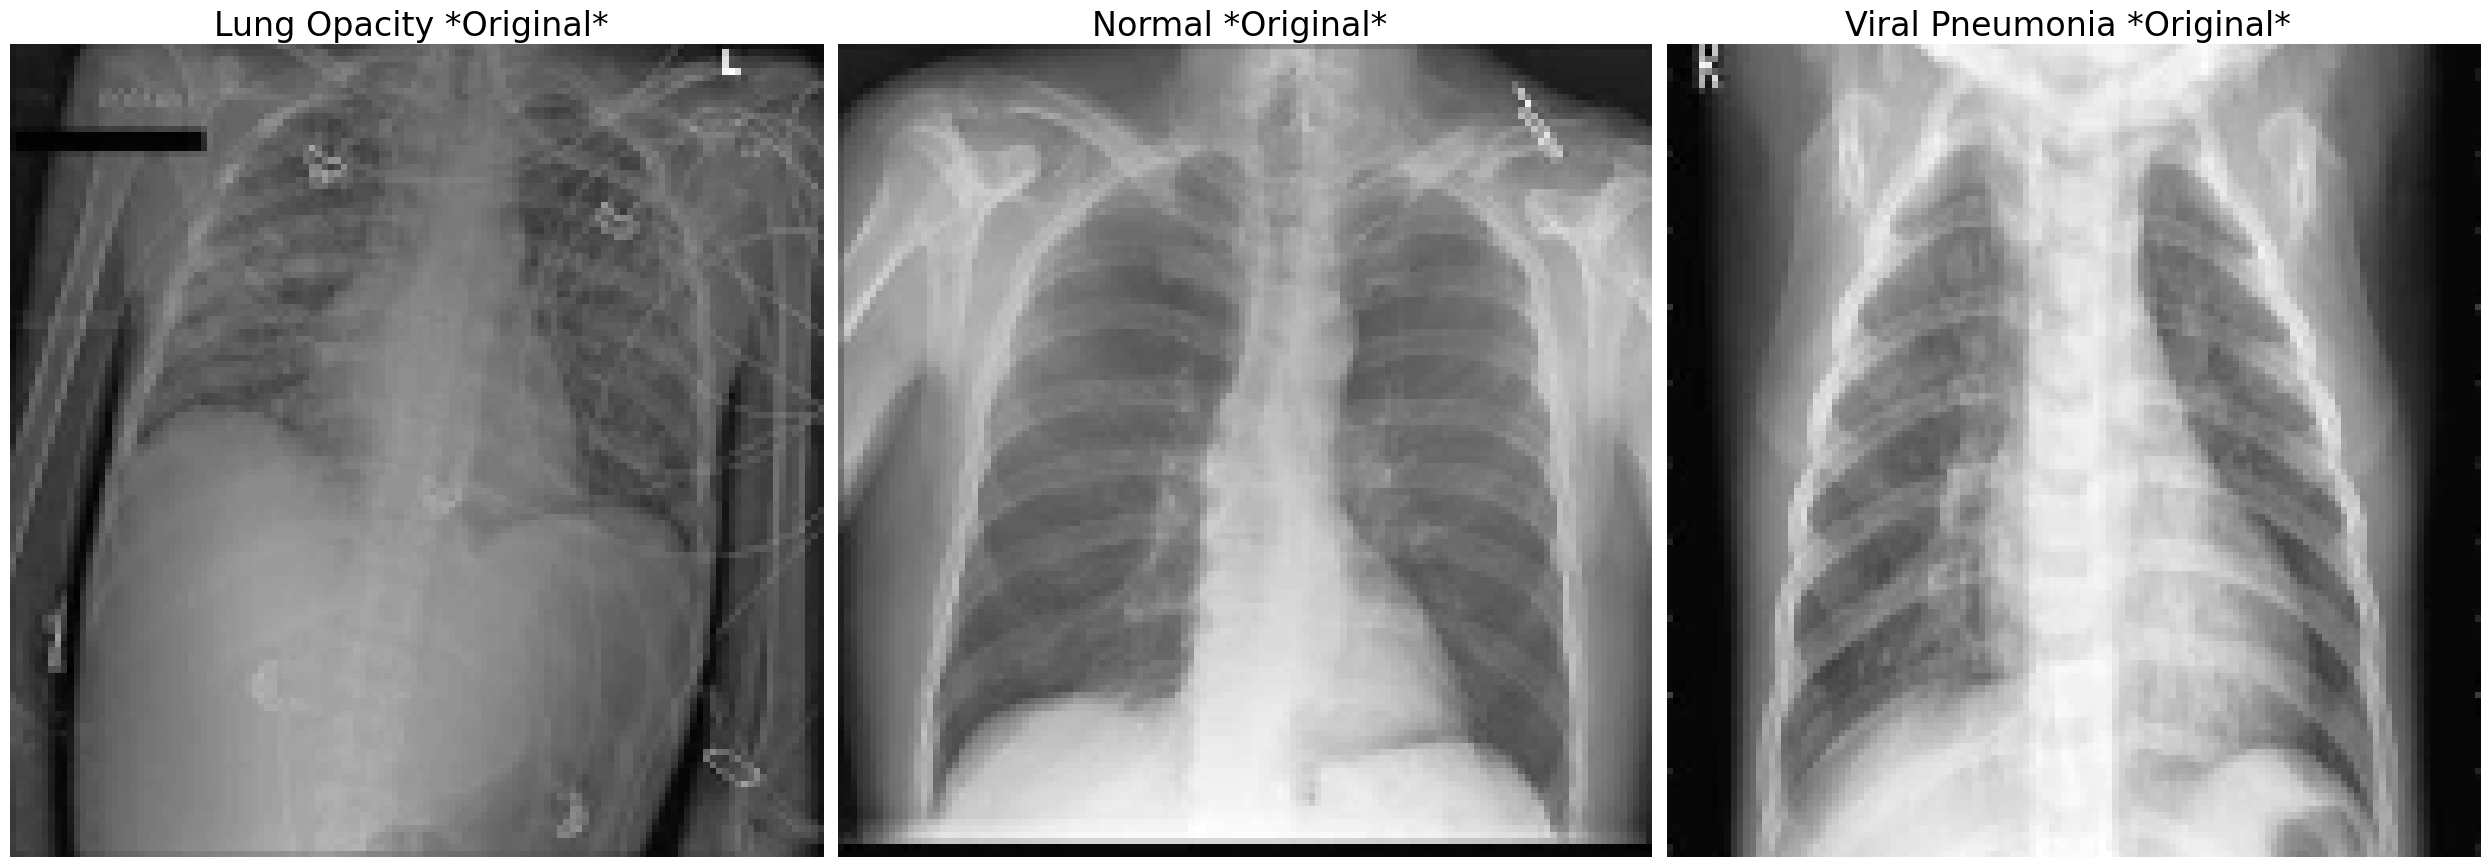

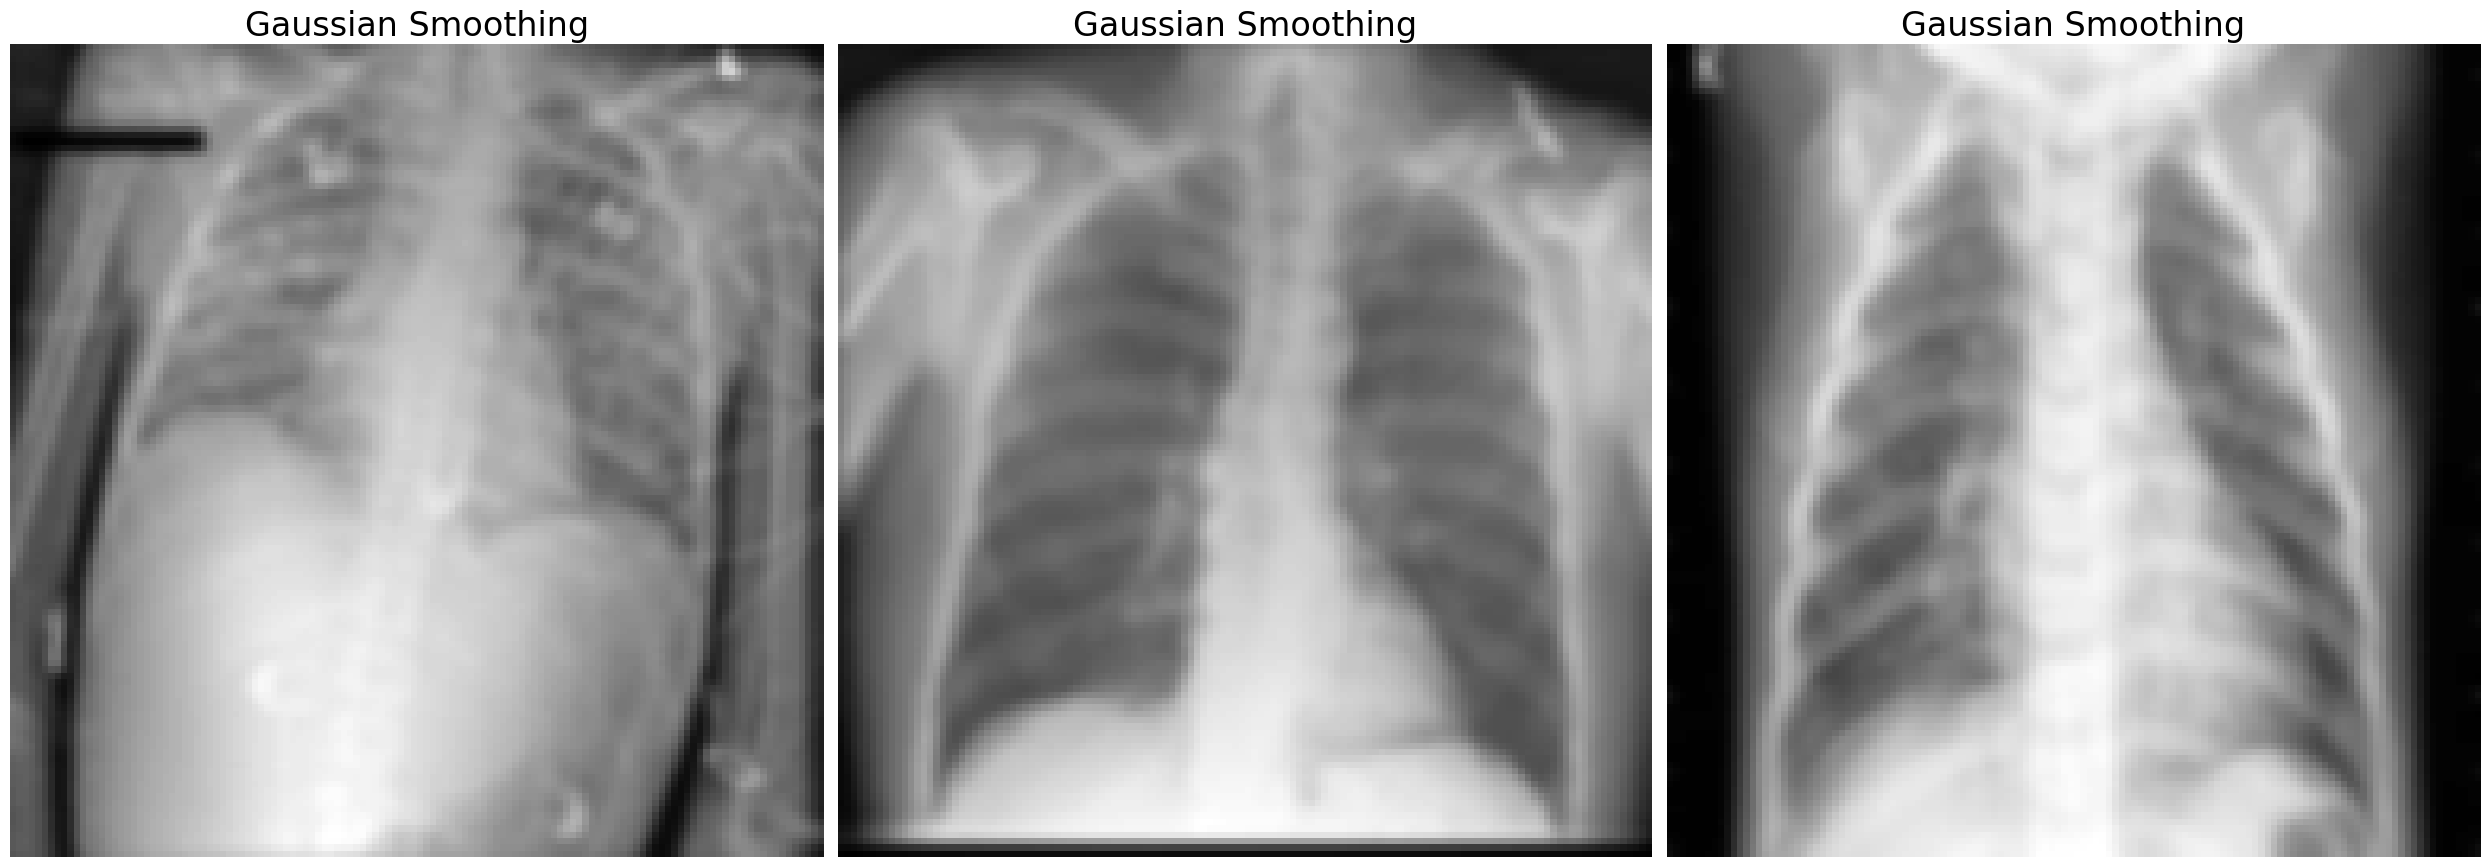

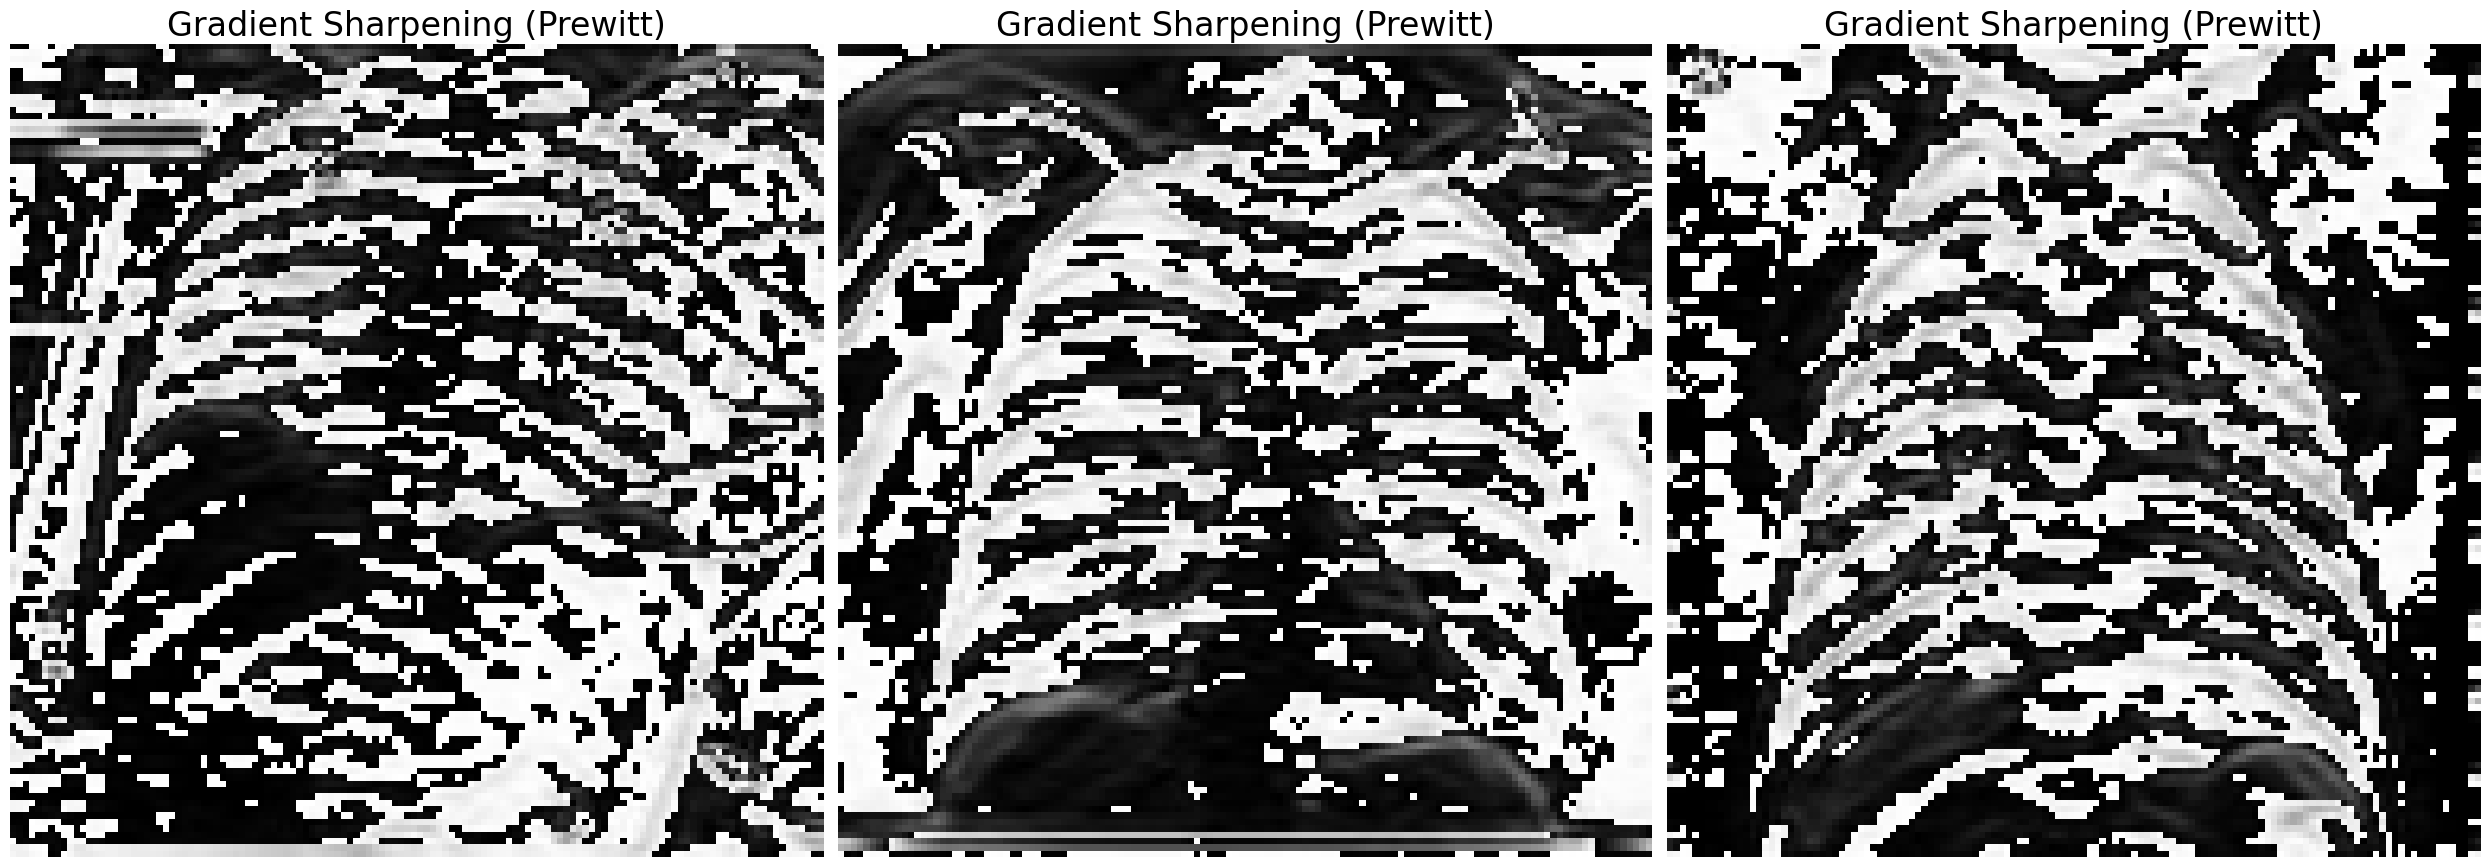

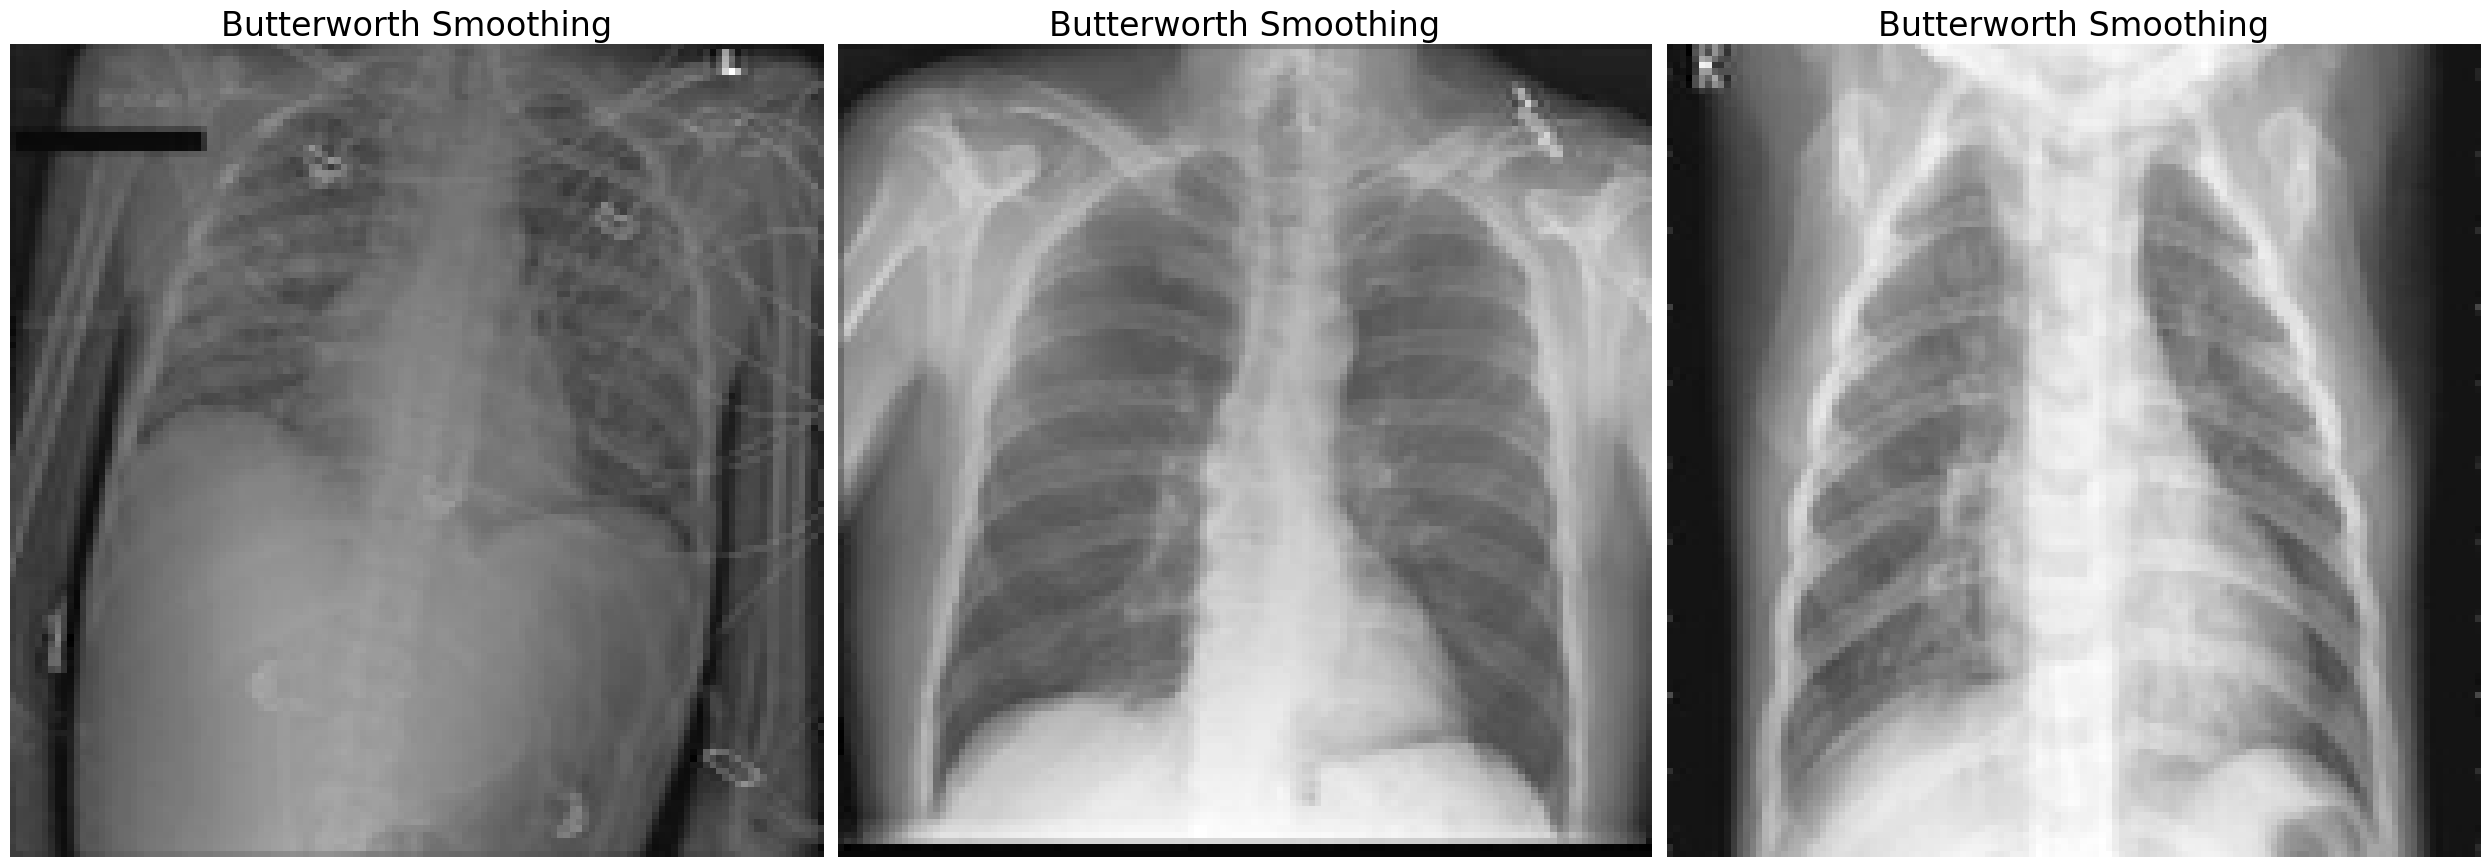

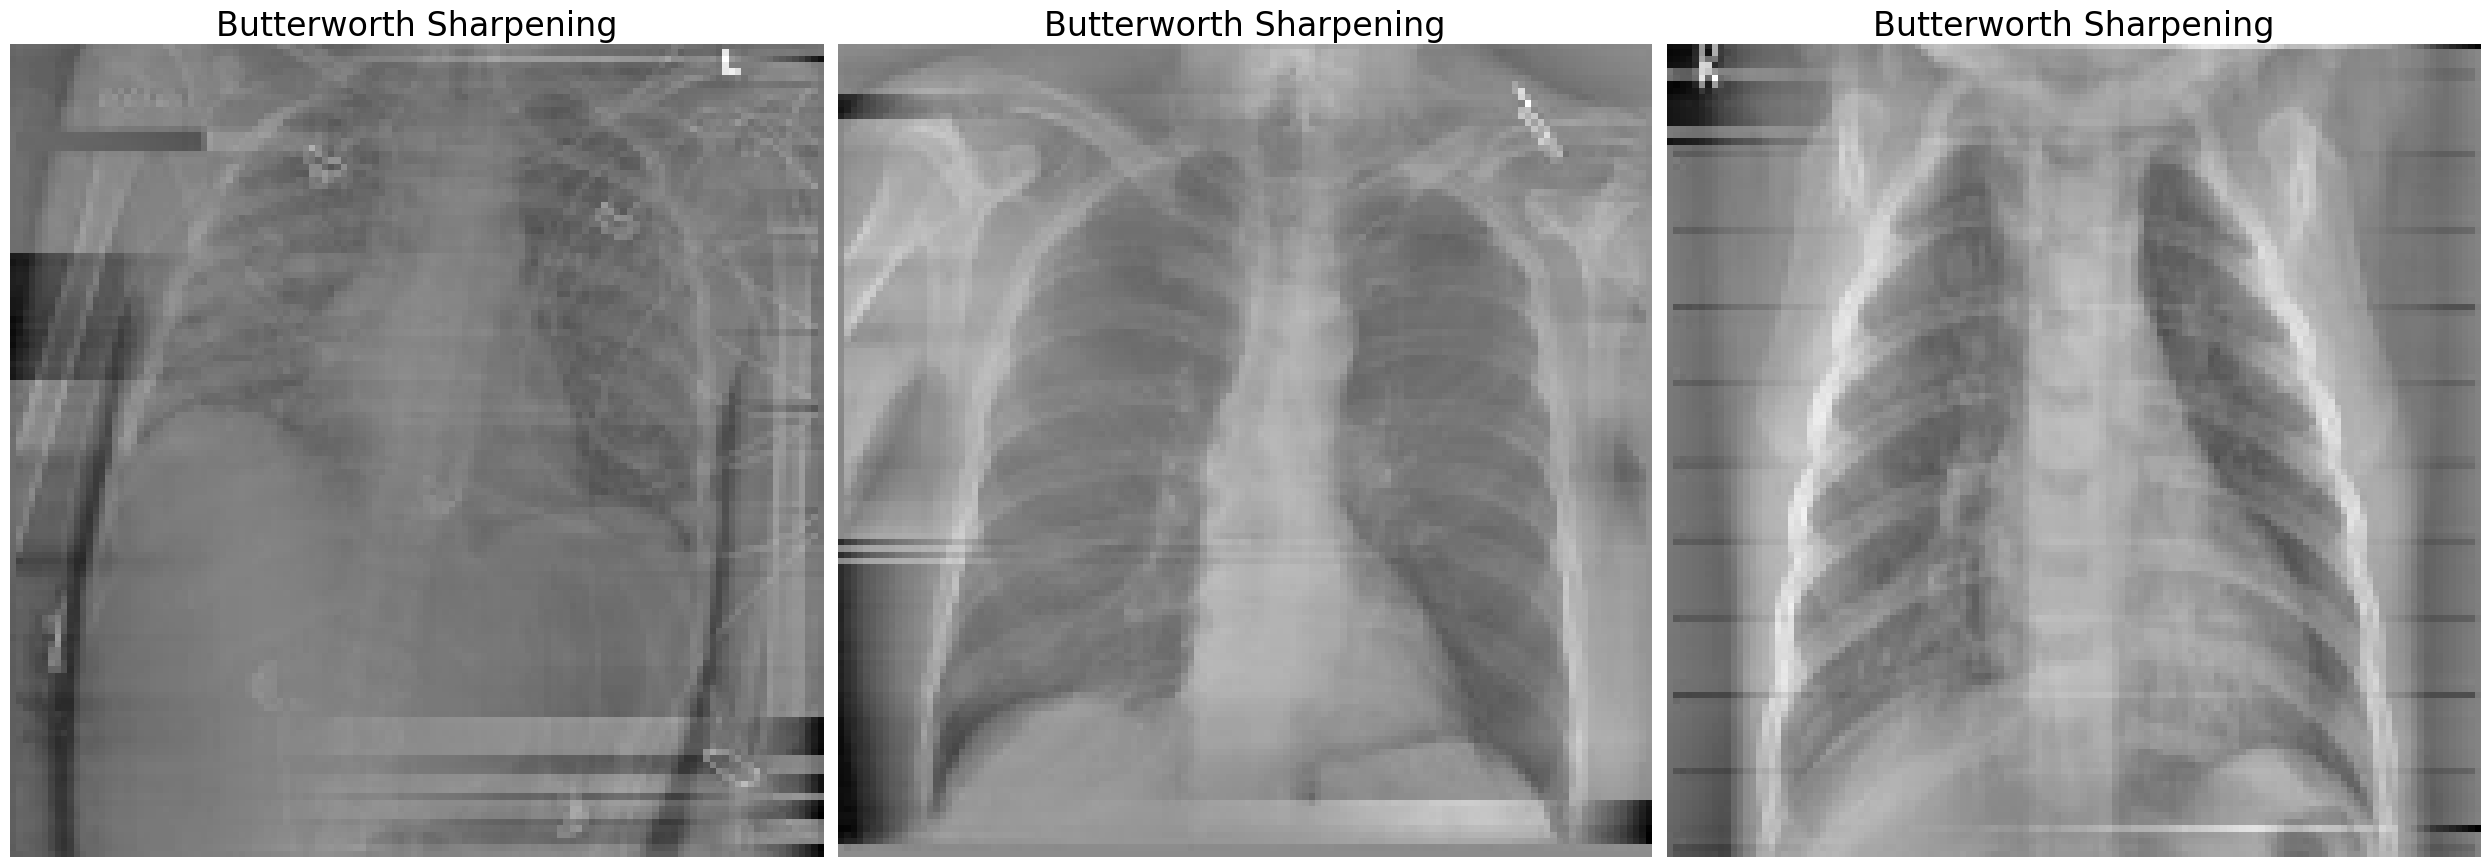

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(25,25)) # plt.subplots:to controll size of the figure and images will displayed
for i, ax in enumerate(axes):

  if i < 3:

    ax.imshow(data['Image'][i*1200],cmap='gray')
    ax.axis('off')
    ax.set_title(labels[i*1200]+' *Original* ',fontsize=24)

plt.tight_layout()
# display image in screen:
plt.show()

#######################################################

def Visualization (image,label):
  fig, axes = plt.subplots(1,3, figsize=(25,25)) # plt.subplots:to controll size of the figure and images will displayed
  for i, ax in enumerate(axes):
    if i < 3:
      ax.imshow(image[i*1200],cmap='gray')
      ax.axis('off')
      ax.set_title(label,fontsize=24)

  plt.tight_layout()
  # display image in screen:
  plt.show()


Visualization(Gaussian_smoothing,'Gaussian Smoothing')
Visualization(Gradient_sharpening,'Gradient Sharpening (Prewitt)')
Visualization(Butterworth_smoothing,'Butterworth Smoothing')
Visualization(Butterworth_sharpening,'Butterworth Sharpening')

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib

class LogisticRegressionCustom(LogisticRegression):
    def __init__(self,max_iter=100):
        super().__init__(max_iter=max_iter)

    def fit(self, X, y):
        return super().fit(X.reshape(X.shape[0], -1), y)

    def score(self, X, y):
        return super().score(X.reshape(X.shape[0], -1), y)

    def predict_one_image(self, X):
        return super().predict(X.reshape(1, -1))

def LogisticRegressionClassifier(imag):
    # Assuming you have your image data and labels as 'imag' and 'labels'
    data = pd.DataFrame({'Image': imag, 'label': labels})

    X = np.array(data['Image'].tolist())
    # Reshape X to 2D array if it's 3D
    if len(X.shape) == 3:
        X = X.reshape(X.shape[0], -1)
    y = np.array(data['label'].tolist())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Initialize model
    model = LogisticRegressionCustom(max_iter=500)

    # Train model
    model.fit(X_train, y_train)

    joblib.dump(model, 'logistic_regression_model.pkl')
    print("Model saved successfully!")

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Model Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

# Example usage:
# LogisticRegressionClassifier(images_data)


In [ ]:
# Example usage:
LogisticRegressionClassifier(images)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model saved successfully!
Model Accuracy: 0.8129496402877698
Precision: 0.8129982832911704
Recall: 0.813451082374291
F1 Score: 0.8132139654614504


In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pickle

def train_random_forest_classifier(imag, labels):
    # Assuming you have your image data and labels as 'imag' and 'labels'
    data = pd.DataFrame({'Image': imag, 'label': labels})

    X = np.array(data['Image'].tolist())
    # Reshape X to 2D array if it's 3D
    if len(X.shape) == 3:
        X = X.reshape(X.shape[0], -1)
    y = np.array(data['label'].tolist())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier()

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Model Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


    # Save the trained model using pickle
    with open('Random_Forest_Classifier.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Model saved successfully!")

    return model

def main():
    # Example usage of train_random_forest_classifier function
    train_random_forest_classifier(images, labels)

if __name__ == "__main__":
    main()


Model Accuracy: 0.8345323741007195
Precision: 0.8323359891534384
Recall: 0.8353236176262002
F1 Score: 0.8330662264900931
Model saved successfully!


In [ ]:
import cv2
import numpy as np
import pickle

def load_model(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def preprocess_image(image):
    # Read the image using OpenCV
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the size used during training
    image_resized = cv2.resize(image_gray, (128, 128))

    # Flatten the resized image into a 1D array
    image_flat = image_resized.reshape(1, -1)

    return image_flat

def main():
    # Load the trained model
    model_path = '/content/Random_Forest_Classifier.pkl'
    model = load_model(model_path)

    # Example usage: Predicting on an image
    # Load the image (replace 'image_path' with the path to your image)
    image_path = '/content/Dataset/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1.jpg'
    image = cv2.imread(image_path)

    # Preprocess the image
    image_flat = preprocess_image(image)

    # Make predictions
    prediction = model.predict(image_flat)

    # Print the predicted label
    print(f'Predicted label: {prediction}')

if __name__ == "__main__":
    main()


Predicted label: ['Lung Opacity']


In [ ]:
# Example usage:
RandomForestClassifier(images)

Model saved successfully!
Model Accuracy: 0.8330935251798561
Precision: 0.8309188282359014
Recall: 0.8338071096142873
F1 Score: 0.8316799941519349


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib

class DecisionTree(DecisionTreeClassifier):
    def __init__(self):
        super().__init__()

    def fit(self, X, y):
        return super().fit(X.reshape(X.shape[0], -1), y)

    def score(self, X, y):
        return super().score(X.reshape(X.shape[0], -1), y)

    def predict_one_image(self, X):
        return super().predict(X.reshape(1, -1))

def DecisionTreeClassifier(imag):
    # Assuming you have your image data and labels as 'imag' and 'labels'
    data = pd.DataFrame({'Image': imag, 'label': labels})

    X = np.array(data['Image'].tolist())
    # Reshape X to 2D array if it's 3D
    if len(X.shape) == 3:
        X = X.reshape(X.shape[0], -1)
    y = np.array(data['label'].tolist())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Initialize model
    model = DecisionTree()

    # Train model
    model.fit(X_train, y_train)

    joblib.dump(model, 'Decision_Tree_Classifier.pkl')
    print("Model saved successfully!")

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Model Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')




In [ ]:
# Example usage:
DecisionTreeClassifier(images)

Model saved successfully!
Model Accuracy: 0.7294964028776978
Precision: 0.7314600852194838
Recall: 0.73022486082042
F1 Score: 0.7301970397879808


In [ ]:
import joblib
import numpy as np
import cv2

# Load the trained model
model = joblib.load('Random_Forest_Classifier.pkl')

# Load and preprocess the new image
# Assuming 'new_image_path' is the path to your new image
new_image_path = "/content/1.jpg"

# Read the new image using OpenCV
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

# Resize the new image to match the size used during training
new_image_resized = cv2.resize(new_image, (128, 128))

# Flatten the resized image into a 1D array
new_image_flat = new_image_resized.reshape(1, -1)

# Make predictions
prediction = model.predict(new_image_flat)

# Print the predicted label
print(f'Predicted label: {prediction}')


Predicted label: ['Lung Opacity']
